In [1]:
import sys, os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import math

In [2]:
from importlib import reload

# PATHS

In [3]:
from pathlib import Path

path_data = '/home/lemasle/PROJECTS/UCI_electricity_consumption/data/UC_Irvine_ML_repository/'
path_src = Path('./src')
sys.path.append(os.path.abspath(path_src))
path_figs = Path('./figs')

In [4]:
import files_io as files_io
import cleaning as cleaning
import chunk_features as chunk_features

In [5]:
cm = 1/2.54

# IMPORT & CLEAN DATA

In [6]:
files_io.extract_zip(path_data, 'individual+household+electric+power+consumption.zip')
data = files_io.import_data_UCI(path_data, 'household_power_consumption.txt')
data.describe()

,date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,2008-12-06 07:12:59.999994112,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
min,2006-12-16 17:24:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-12 00:18:30,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-12-06 07:13:00,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-12-01 14:07:30,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 21:02:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00


In [7]:
list_col = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', \
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

count, percent = cleaning.check_nans(data)

NULL VALUES PER COLUMN:
date                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64
% OF NULL VALUES PER COLUMN:
date                     0.0
Global_active_power      1.3
Global_reactive_power    1.3
Voltage                  1.3
Global_intensity         1.3
Sub_metering_1           1.3
Sub_metering_2           1.3
Sub_metering_3           1.3
dtype: float64


#### Replace NaNs with interpolated values

In [8]:
data = cleaning.linear_interpolate_nans(data, list_col)

In [9]:
count, percent = cleaning.check_nans(data)

NULL VALUES PER COLUMN:
date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64
% OF NULL VALUES PER COLUMN:
date                     0.0
Global_active_power      0.0
Global_reactive_power    0.0
Voltage                  0.0
Global_intensity         0.0
Sub_metering_1           0.0
Sub_metering_2           0.0
Sub_metering_3           0.0
dtype: float64


# Prepare chunks

In [10]:
list_years = [2010]
n_items = 15
shift0_chunks = chunk_features.prepare_input_chunks(data, list_years, n_items)

The selected data consists of 31667 chunks.


### We want more chunks than those starting at t0 + 0/15/30/45min

In [11]:
# chunks starting at t0 + 5min
shift5 = data.iloc[5:]
# chunks starting at t0 + 10min
shift10 = data.iloc[10:]
# chunks starting at t0 + 15min and further: we already have them

In [12]:
shift5_chunks = chunk_features.prepare_input_chunks(shift5, list_years, n_items)

The selected data consists of 31667 chunks.


In [13]:
shift10_chunks = chunk_features.prepare_input_chunks(shift5, list_years, n_items)

The selected data consists of 31667 chunks.


In [14]:
shift0_chunks.chunk_index = shift0_chunks.chunk_index*3
shift5_chunks.chunk_index = shift5_chunks.chunk_index*3+1
shift10_chunks.chunk_index = shift10_chunks.chunk_index*3+2

In [15]:
input_chunks = pd.concat([shift0_chunks, shift5_chunks, shift10_chunks], ignore_index=True)

# Get chunk dataframe

In [25]:
input_chunks.chunk_index.max()

95003

In [232]:
features2010 = chunk_features.get_chunk_dataframe(input_chunks)

### Save chunk dataframe

In [254]:
files_io.save_h5_file(features2010, 'chunk_features_2010', path_data, 'UCI_chunk_features_2010.h5')

# Visualize a few chunks

In [294]:
reload(chunk_features)

<module 'chunk_features' from '/home/lemasle/PROJECTS/UCI_electricity_consumption/src/chunk_features.py'>

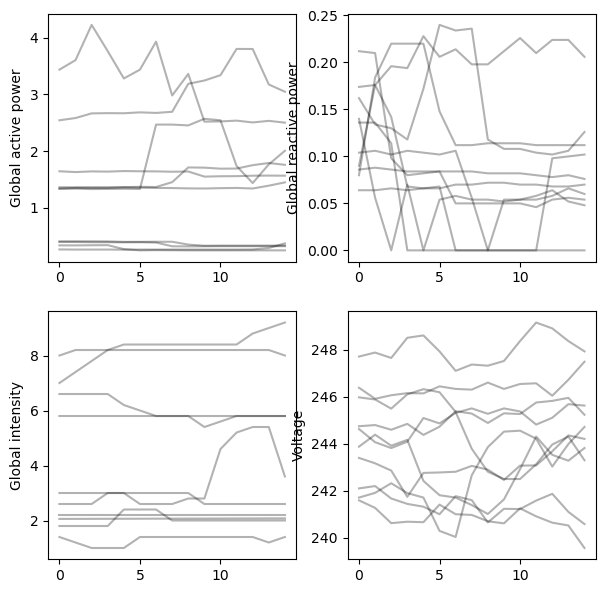

In [295]:
chunk_features.visualize_chunks(input_chunks, path_figs, 'UCI_first_10_chunks.pdf', cm)